In [1]:
import pandas as pd

df = pd.read_csv("healthcare_dataset.csv")

In [2]:
print(df)

                    Name  Age  Gender Blood Type Medical Condition  \
0          Bobby JacksOn   30    Male         B-            Cancer   
1           LesLie TErRy   62    Male         A+           Obesity   
2            DaNnY sMitH   76  Female         A-           Obesity   
3           andrEw waTtS   28  Female         O+          Diabetes   
4          adrIENNE bEll   43  Female        AB+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  eLIZABeTH jaCkSOn   42  Female         O+            Asthma   
55496         KYle pEREz   61  Female        AB-           Obesity   
55497       HEATher WaNG   38  Female         B+      Hypertension   
55498     JENniFER JOneS   43    Male         O-         Arthritis   
55499       jAMES GARCiA   53  Female         O+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            31-01-2024     Matthew Smith               Sons and Miller   
1        

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [4]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [8]:
#dropping the irrelevant columns

df = df.drop(columns=["Name", "Doctor", "Room Number", "Hospital"])
df

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,30,Male,B-,Cancer,31-01-2024,Blue Cross,18856.281310,Urgent,02-02-2024,Paracetamol,Normal
1,62,Male,A+,Obesity,20-08-2019,Medicare,33643.327290,Emergency,26-08-2019,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,22-09-2022,Aetna,27955.096080,Emergency,07-10-2022,Aspirin,Normal
3,28,Female,O+,Diabetes,18-11-2020,Medicare,37909.782410,Elective,18-12-2020,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,19-09-2022,Aetna,14238.317810,Urgent,09-10-2022,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...
55495,42,Female,O+,Asthma,16-08-2020,Blue Cross,2650.714952,Elective,15-09-2020,Penicillin,Abnormal
55496,61,Female,AB-,Obesity,23-01-2020,Cigna,31457.797310,Elective,01-02-2020,Aspirin,Normal
55497,38,Female,B+,Hypertension,13-07-2020,UnitedHealthcare,27620.764720,Urgent,10-08-2020,Ibuprofen,Abnormal
55498,43,Male,O-,Arthritis,25-05-2019,Medicare,32451.092360,Elective,31-05-2019,Ibuprofen,Abnormal


In [10]:
# Convert to datetime with dayfirst=True
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], dayfirst=True)
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], dayfirst=True)

# Create Length of Stay
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Drop original date columns
df.drop(columns=["Date of Admission", "Discharge Date"], inplace=True)

# View result
df[['Age', 'Length of Stay']].head()


,Age,Length of Stay
0,30,2
1,62,6
2,76,15
3,28,30
4,43,20


In [11]:
from sklearn.preprocessing import LabelEncoder

# Define categorical columns
categorical_cols = ['Gender', 'Blood Type', 'Medical Condition', 
                    'Insurance Provider', 'Admission Type', 'Medication']

# Initialize encoders
le_dict = {}

# Encode each column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # store encoder for inverse transform if needed


In [12]:
# Print final column names and data types
print("Final columns:", df.columns.tolist())
print("Data types:\n", df.dtypes)

# Display a few rows
df.head()


Final columns: ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Billing Amount', 'Admission Type', 'Medication', 'Test Results', 'Length of Stay']
Data types:
 Age                     int64
Gender                  int32
Blood Type              int32
Medical Condition       int32
Insurance Provider      int32
Billing Amount        float64
Admission Type          int32
Medication              int32
Test Results           object
Length of Stay          int64
dtype: object


,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Length of Stay
0,30,1,5,2,1,18856.28131,2,3,Normal,2
1,62,1,0,5,3,33643.32729,1,1,Inconclusive,6
2,76,0,1,5,0,27955.09608,1,0,Normal,15
3,28,0,6,3,3,37909.78241,0,1,Abnormal,30
4,43,0,2,2,0,14238.31781,2,4,Abnormal,20


In [13]:
# Basic stats of numeric features
df.describe()


,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Length of Stay
count,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000
mean,51.539459,0.500432,3.492595,2.498847,2.009351,25539.316097,0.998577,1.998054,15.509009
std,19.602454,0.500004,2.289700,1.708336,1.410144,14211.454431,0.819048,1.413244,8.659600
min,13.000000,0.000000,0.000000,0.000000,0.000000,-2008.492140,0.000000,0.000000,1.000000
25%,35.000000,0.000000,1.000000,1.000000,1.000000,13241.224655,0.000000,1.000000,8.000000
50%,52.000000,1.000000,3.000000,3.000000,2.000000,25538.069380,1.000000,2.000000,15.000000
75%,68.000000,1.000000,5.000000,4.000000,3.000000,37820.508432,2.000000,3.000000,23.000000
max,89.000000,1.000000,7.000000,5.000000,4.000000,52764.276740,2.000000,4.000000,30.000000


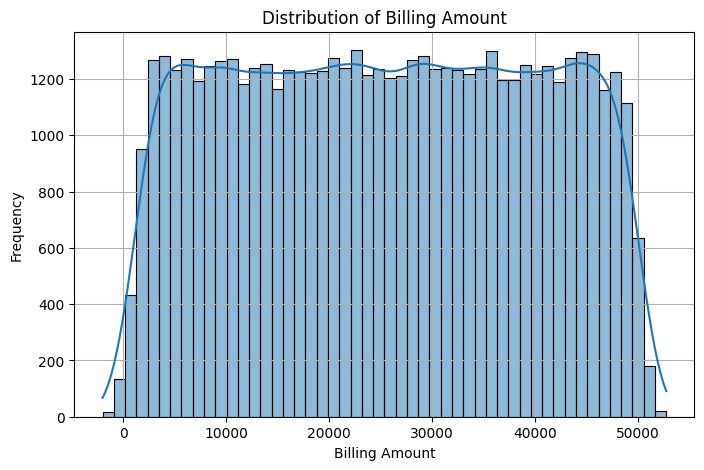

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Billing Amount'], kde=True, bins=50)
plt.title("Distribution of Billing Amount")
plt.xlabel("Billing Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


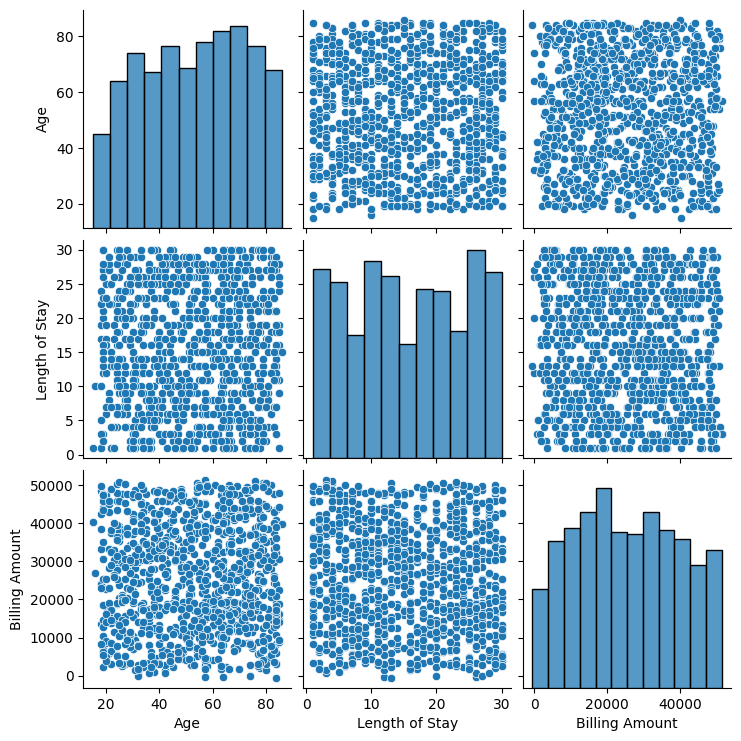

In [18]:
# This can be heavy – use only a subset
sample_df = df.sample(1000, random_state=1)

sns.pairplot(sample_df[['Age', 'Test Results', 'Length of Stay', 'Billing Amount']])
plt.show()


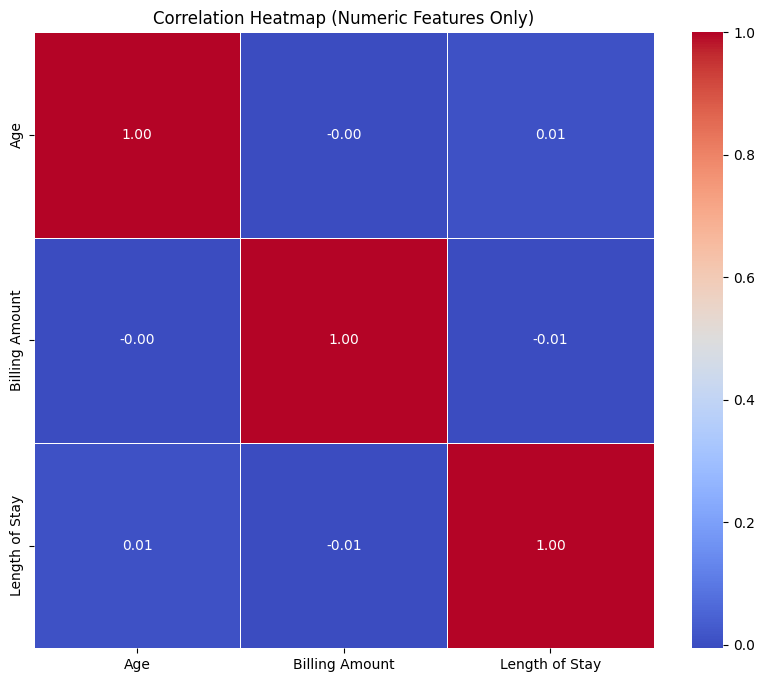

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [22]:
from sklearn.preprocessing import LabelEncoder

# Encode Test Results
le = LabelEncoder()
df['Test Results'] = le.fit_transform(df['Test Results'])


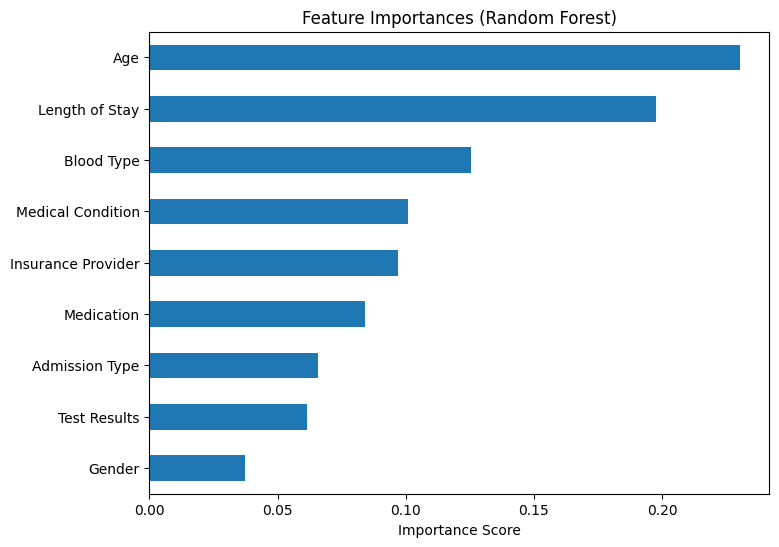

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns=["Billing Amount"])
y = df["Billing Amount"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Plot feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind="barh", figsize=(8, 6))
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define features and target
X = df.drop(columns=["Billing Amount"])
y = df["Billing Amount"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Linear regression model

# Train
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
print("🔹 Linear Regression Results")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


🔹 Linear Regression Results
R² Score: -0.0008845355481010841
MAE: 12192.848667104166
RMSE: 14109.760367285775


In [26]:
# Random forest regressor

# Train
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("🔹 Random Forest Results")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


🔹 Random Forest Results
R² Score: 0.03161989454673164
MAE: 11785.069967941083
RMSE: 13878.757188272528


In [27]:
from xgboost import XGBRegressor

# Train
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print("🔹 XGBoost Results")
print("R² Score:", r2_score(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))


🔹 XGBoost Results
R² Score: -0.038646123587957826
MAE: 12322.342398108152
RMSE: 14373.464170501853


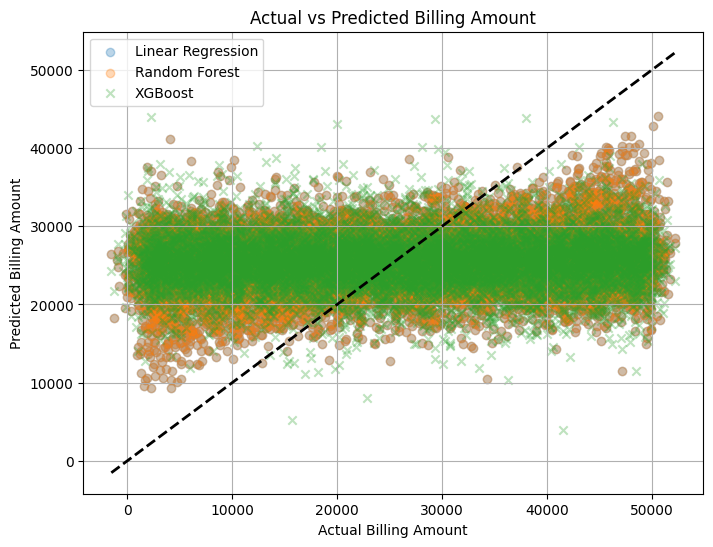

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3, label="Linear Regression")
plt.scatter(y_test, y_pred_rf, alpha=0.3, label="Random Forest")
plt.scatter(y_test, y_pred_xgb, alpha=0.3, label="XGBoost", marker='x')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Billing Amount")
plt.ylabel("Predicted Billing Amount")
plt.title("Actual vs Predicted Billing Amount")
plt.legend()
plt.grid(True)
plt.show()


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Helper function to evaluate and print metrics
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Results")
    print(f"R² Score : {r2_score(y_true, y_pred):.4f}")
    print(f"MAE      : {mean_absolute_error(y_true, y_pred):,.2f}")
    print(f"RMSE     : {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print("-" * 40)

# Evaluate each model
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)


Linear Regression Results
R² Score : -0.0009
MAE      : 12,192.85
RMSE     : 14109.76
----------------------------------------
Random Forest Results
R² Score : 0.0316
MAE      : 11,785.07
RMSE     : 13878.76
----------------------------------------
XGBoost Results
R² Score : -0.0386
MAE      : 12,322.34
RMSE     : 14373.46
----------------------------------------
